# HANDWRITTEN DIGIT RECOGNITION
## Image Recognition of MNIST Digit Dataset with Convolutional Neural Networks.

In [1]:
# basic library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORT DATASET
import dataset from keras dataset (mnist digit)

In [2]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print(str(train_x.shape))
print(str(train_y.shape))
print(str(test_x.shape))
print(str(test_y.shape))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


dataset contain of 60000 training data and 10000 test data. each data consist of 28x28 array of integer, represent pixel value from 0 to 255 (greyscale)

In [3]:
temp = pd.DataFrame(train_y, columns=['label'])
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   60000 non-null  uint8
dtypes: uint8(1)
memory usage: 58.7 KB


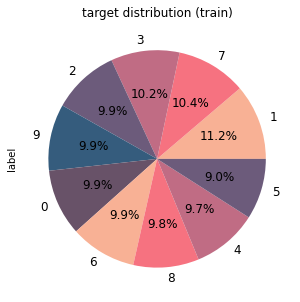

In [4]:
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
colors = ['#f8b195', '#f67280', '#c06c84', '#6c5b7b', '#355c7d','#685268']
ax = (temp['label'].value_counts()*100.0/len(temp)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors)
ax.set_title('target distribution (train)')
plt.show()

digit distribution categories (0-9) balanced.

In [5]:
print(train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

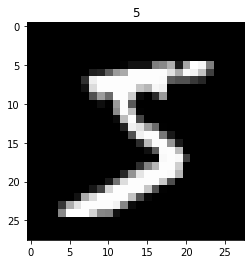

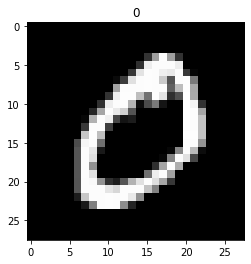

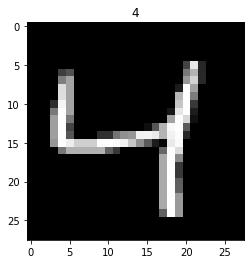

In [7]:
# view dataset
for i in range(3):
    plt.imshow(train_x[i],cmap='gray')
    plt.title(train_y[i])
    plt.show()

## PREPROCESSING
preprocess data to be feed to the model.

In [8]:
# normalize/scale x to scale 0-1
train_x = train_x/255.0
test_x = test_x/255.0

In [9]:
# encoding
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y,10)
test_y = to_categorical(test_y,10)

In [10]:
# reshape to 3d (greyscale, channel=1)
train_x = train_x.reshape(-1,28,28,1)
test_X = test_x.reshape(-1,28,28,1)

## MODEL BUILDING
build CNN model with tensorflow/keras.

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

### Model Architecture: 
input (28 x 28) -> 

Conv2D(relu) -> MaxPooling2D -> Dropout ->

Conv2D(relu) -> MaxPooling2D -> Dropout ->

Flatten -> Dense(relu) -> Dropout -> Dense(softmax) -> out


In [12]:
# CNN model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), activation ='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 32, kernel_size = (4,4), activation ='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

In [13]:
# compile
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 32)          0

## MODEL TRAINING
feed data to model and train.

In [14]:
epoch = 10
batch = 32

In [15]:
model.fit(train_x, train_y, epochs=epoch, batch_size=batch)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1959 - accuracy: 0.9382
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0708 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0585 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0467 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0409 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0386 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0317 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0311 - accuracy: 0.9899
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [16]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 9ms/step - loss: 0.0215 - accuracy: 0.9934


[0.021548427641391754, 0.993399977684021]

### RESULT
we've build CNN model to recognize handwritten digit image. 

Accuracy result:
- Train (10 epoch)  : loss: 0.0288 - accuracy: 0.9906
- Test              : loss: 0.0285 - accuracy: 0.9934